In [ ]:
#Project objective
#Develop a machine-learning model that analyzes a nutrition dataset to understand the 
#features of the data and predict the countries producing food items with high nutrition 
#scores based on the French scoring system “nutrition-score-fr_100g”.

#Dataset project
#"The project gathers information and data on food products from around the world.[1]
#For each item, the database stores its generic name, quantity, type of packaging, brand,
#category, manufacturing or processing locations, countries and stores where the product is sold, 
#list of ingredients, any traces (for allergies, dietary laws or any specific diet), 
#food additives and nutritional information. The nutritional value is calculated using the Nutri-Score."[11]
#Source: https://en.wikipedia.org/wiki/Open_Food_Facts



#Dataset structure
#The dataset contains a single table, FoodFacts, in CSV form in FoodFacts.csv and in 
#SQLite form in database.sqlite. [163 columns and 356,027 total values]. 
#File name: en.openfoodfacts.org.products.tsv

#After removing some of the irrelevant columns and rows the data size is now 49040 rows × 123 columns. 
#Possibly this number will go lower with further cleaning for the data.



In [138]:
import os
import csv
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import statsmodels.formula.api as sm
%matplotlib inline

#print(os.getcwd())
data = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t', low_memory=False)

In [137]:
#The orignial size of the dataset
print('There are {:,} rows '.format(data.shape[0]) + 'and {} columns in FoodFacts data'.format(data.shape[1]))

There are 66,565 rows and 162 columns in FoodFacts data


In [3]:
data.shape
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=163)

In [3]:
data.set_index('code', inplace=True)

In [6]:
data.head()

,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
code,,,,,,,,,,,,,,,,,,,,,
0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#exploring the coutries column
print(data["countries"].unique())
#print(data.groupby(["countries_tags"]).count().sort_values(ascending=False, inplace=True))
t = data.groupby(["countries_tags"])["countries_tags"].count()
t.sort_values(ascending=False, inplace=True)
print(t.head())

['en:FR' 'US' 'France' ... 'Malaisie' 'en:HK, en:france' 'Hong Kong,China']
countries_tags
en:united-states    173159
en:france           123960
en:switzerland       14932
en:germany            8470
en:spain              5529
Name: countries_tags, dtype: int64


In [17]:
data1 = data.drop(columns=['url',
                          'creator',
                          'brands',
                          'categories', 'categories_en','main_category',         
                          'states',
                          'packaging',
                          'created_t',
                          'last_modified_t',
                          'water-hardness_100g',
                          'chlorophyl_100g',
                          'labels','labels_tags','taurine_100g','allergens_en',
                             ])


In [18]:
data1 #the outcome is 356027 rows × 146 columns


,created_datetime,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins,origins_tags,...,caffeine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g
code,,,,,,,,,,,,,,,,,,,,,
0000000003087,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,ferme-t-y-r-nao,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000004530,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN
0000000004559,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,torn-glasser,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
0000000016087,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,grizzlies,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN
0000000016094,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,NaN,bob-s-red-mill,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000016100,2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,NaN,NaN,unfi,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000016117,2017-03-09T10:35:30Z,2017-03-09T10:35:30Z,Organic Long Grain White Rice,NaN,NaN,NaN,lundberg,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000016124,2017-03-09T10:35:11Z,2017-03-09T10:35:12Z,Organic Muesli,NaN,NaN,NaN,daddy-s-muesli,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN
0000000016193,2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,Organic Dark Chocolate Minis,NaN,NaN,NaN,equal-exchange,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#dropping the rows with none vlaues in countries and nutrition-score-fr_100g
data1.dropna(subset = ["countries_tags"], inplace = True)
data1.dropna(subset = ["nutrition-score-fr_100g"],  inplace = True)##the outcome is 254798 rows × 146 columns
data1.dropna(subset = ["purchase_places"], inplace = True)##The outcome is 49040 rows × 146 columns

In [29]:
data1.shape 
data1

,created_datetime,last_modified_datetime,product_name,generic_name,quantity,packaging_tags,brands_tags,categories_tags,origins,origins_tags,...,caffeine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g
code,,,,,,,,,,,,,,,,,,,,,
0000001938067,2017-01-15T17:32:08Z,2017-01-15T18:29:32Z,Chaussons tressés aux pommes,Pâtisserie,1.200 kg,frais,kirkland-signature,"en:sugary-snacks,en:biscuits-and-cakes,en:past...",Québec,quebec,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,NaN
0000004302544,2017-03-02T14:28:16Z,2017-03-02T14:41:27Z,Pain Burger Artisan,Pain,1.008 kg / 12 pain,"frais,plastique",kirkland-signature,fr:boulange,Québec,quebec,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
0000007020254,2015-01-01T22:09:53Z,2017-09-02T18:18:21Z,Root Beer,NaN,33 cl e,"canette,metal",a-w,"en:beverages,en:carbonated-drinks,en:sodas,en:...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,3.0,NaN
0000008237798,2017-04-11T20:41:47Z,2017-04-11T21:01:28Z,Quiche Lorraine,Quiche lorraine,1 400 kg,frai,kirkland-signature,"en:meals,en:pizzas-pies-and-quiches,en:quiches...",Québec,quebec,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN
0000027533024,2014-12-16T12:29:19Z,2016-08-12T12:33:29Z,Luxury Christmas Pudding,NaN,454g,"plastic,bowl","asda,asda-extra-special","en:desserts,en:puddings,en:christmas-puddings",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,NaN
0000027533048,2014-12-16T12:28:35Z,2016-09-25T15:35:24Z,Luxury Christmas Pudding,NaN,907g,"plastic,bowl","asda,asda-extra-special","en:sugary-snacks,en:biscuits-and-cakes,en:dess...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,NaN
0000040608754,2012-08-15T09:48:28Z,2015-08-09T17:35:31Z,"Pepsi, Nouveau goût !",Boisson gazeuse rafraîchissante aux extraits n...,15 cl,canette-aluminium,pepsi,"en:beverages,en:carbonated-drinks,en:sodas,en:...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,2.0,NaN
0000087177756,2015-06-06T10:28:06Z,2015-06-06T11:13:26Z,7Up,Boisson gazeuse aux extraits naturels de citro...,33 cl,canette,"7up,pepsico","en:plant-based-foods-and-beverages,en:beverage...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,2.0,NaN
000010,2016-10-20T07:19:01Z,2016-10-20T09:14:39Z,Madeleines nature,NaN,880 g,"carton,plastique",bijou,"en:sugary-snacks,en:biscuits-and-cakes,en:dess...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN


In [30]:
for col_name in data1.columns: 
    print(col_name)

created_datetime
last_modified_datetime
product_name
generic_name
quantity
packaging_tags
brands_tags
categories_tags
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
traces
traces_tags
traces_en
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states_tags
states_en
main_category_en
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
-butyric-acid_100g
-caproic-acid_100g
-caprylic-acid_100g
-capric-acid_100g
-lauric-acid_100g
-myristic-acid_100g
-palmitic-acid_100g
-stearic-

In [31]:
#Exploring the missing vlaues in the energy-from-fat_100g colunm
print(data1["energy-from-fat_100g"].unique())

[   nan 1110.  1260.  1240.     0.   502.  1200.   265.    75.   984.
  985.  1170.  1000.   804.   896.   627.   965.   750.   175.   168.
  225.    97.7   80.8  539.   181.   840.  2900.   191.  1390.   633.
 1530.  1440.   131.  2690.  3350.  1050.  3590.   754.   420.   440.
  309.   746.  1350.  1790.  1670.   290.   262.   560.  1560.   767.
 1960.   838.  2990.   130.  1780.  1990.  1300.  1360.  1830.   362.
 1250.   159.    33.6  700.   300.   323.   837.  1120.   581.  2310.
  586.   674.   521.   557.   738.   235.   147.   105.   784.    87.5
   70.    61.8 1650.  1700.   315.   218.   741.   882.   146.    69.6
   57.6  697.   103.   163.   862.  1950.   129.    37.1 1500.    99.2
  792.   339.    11.3  280.  1290.   859.   201.   471.   394.   197.
 1010.   669.    46.3 1980.  1570.   277.   303.    21.   137.  1190.
  628.    37.2  122.  1470.   349.   898.  1100.  1060.   699.   392.
 1255.   167.   726.    65.   220.   565.   488.   334.   185.   221.
   50.4   79.7  5

In [32]:
sum(data1["energy-from-fat_100g"].isnull().values.ravel())
# the outcome is 48706 rows, i.e. many missing data for this column

48706

In [36]:
#Identifying the columning with missing vlaues
for col_name in data1.columns: 
    print(col_name,"\t", sum(data1[col_name].isnull().values.ravel()))

created_datetime 	 1
last_modified_datetime 	 0
product_name 	 142
generic_name 	 13551
quantity 	 460
packaging_tags 	 924
brands_tags 	 129
categories_tags 	 664
origins 	 35637
origins_tags 	 35650
manufacturing_places 	 22623
manufacturing_places_tags 	 22624
labels_en 	 19367
emb_codes 	 28226
emb_codes_tags 	 28227
first_packaging_code_geo 	 35027
cities 	 49040
cities_tags 	 33914
purchase_places 	 0
stores 	 7912
countries 	 0
countries_tags 	 0
countries_en 	 0
ingredients_text 	 1756
allergens 	 26074
traces 	 30557
traces_tags 	 30558
traces_en 	 30558
serving_size 	 21930
no_nutriments 	 49040
additives_n 	 1756
additives 	 1771
additives_tags 	 20934
additives_en 	 20934
ingredients_from_palm_oil_n 	 1756
ingredients_from_palm_oil 	 49040
ingredients_from_palm_oil_tags 	 46051
ingredients_that_may_be_from_palm_oil_n 	 1756
ingredients_that_may_be_from_palm_oil 	 49040
ingredients_that_may_be_from_palm_oil_tags 	 43790
nutrition_grade_uk 	 49040
nutrition_grade_fr 	 0
pnns_

In [41]:
#Selecting the revlevent colums with acceptable number of missing values
data2=data1[["product_name","quantity","packaging_tags","brands_tags","categories_tags","origins_tags","manufacturing_places_tags",
            "cities_tags", "purchase_places","countries_tags","serving_size","additives_tags", "nutrition_grade_fr","states_tags",
            "image_small_url","energy_100g","fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g",
            "salt_100g","sodium_100g","nutrition-score-fr_100g","nutrition-score-uk_100g"]]

#data2.set_index('code2', inplace=True)
data2

,product_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,cities_tags,purchase_places,countries_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
code,,,,,,,,,,,,,,,,,,,,,
0000001938067,Chaussons tressés aux pommes,1.200 kg,frais,kirkland-signature,"en:sugary-snacks,en:biscuits-and-cakes,en:past...",quebec,brossard-quebec,NaN,Brossard Québec,en:canada,...,10.70,2.000,38.70,24.700,2.000,3.330,0.647000,0.255000,9.0,9.0
0000004302544,Pain Burger Artisan,1.008 kg / 12 pain,"frais,plastique",kirkland-signature,fr:boulange,quebec,"brossard,quebec",NaN,"Brossard,Québec",en:canada,...,1.11,0.333,53.30,1.110,2.220,10.000,1.520000,0.600000,1.0,1.0
0000007020254,Root Beer,33 cl e,"canette,metal",a-w,"en:beverages,en:carbonated-drinks,en:sodas,en:...",NaN,etats-unis,NaN,France,en:france,...,0.00,0.000,14.20,13.600,0.000,0.000,0.061600,0.024200,18.0,3.0
0000008237798,Quiche Lorraine,1 400 kg,frai,kirkland-signature,"en:meals,en:pizzas-pies-and-quiches,en:quiches...",quebec,"brossard,quebec",NaN,"Brossard,Québec",en:canada,...,6.79,2.860,7.86,0.714,0.357,5.360,0.499000,0.196000,2.0,2.0
0000027533024,Luxury Christmas Pudding,454g,"plastic,bowl","asda,asda-extra-special","en:desserts,en:puddings,en:christmas-puddings",NaN,united-kingdom,NaN,"Liverpool,United Kingdom",en:united-kingdom,...,7.00,3.600,54.20,44.000,4.700,3.900,0.200000,0.078740,10.0,10.0
0000027533048,Luxury Christmas Pudding,907g,"plastic,bowl","asda,asda-extra-special","en:sugary-snacks,en:biscuits-and-cakes,en:dess...",NaN,united-kingdom,NaN,"Liverpool,United Kingdom",en:united-kingdom,...,7.00,3.600,54.20,44.000,4.700,3.900,0.199898,0.078700,10.0,10.0
0000040608754,"Pepsi, Nouveau goût !",15 cl,canette-aluminium,pepsi,"en:beverages,en:carbonated-drinks,en:sodas,en:...",NaN,NaN,NaN,Avion,en:france,...,0.00,0.000,10.40,10.400,0.000,0.000,0.025400,0.010000,13.0,2.0
0000087177756,7Up,33 cl,canette,"7up,pepsico","en:plant-based-foods-and-beverages,en:beverage...",NaN,NaN,NaN,"Courrières,France",en:france,...,0.00,0.000,10.40,10.400,NaN,0.000,0.100000,0.039370,13.0,2.0
000010,Madeleines nature,880 g,"carton,plastique",bijou,"en:sugary-snacks,en:biscuits-and-cakes,en:dess...",NaN,NaN,NaN,"Lyon,France",en:france,...,23.00,2.500,55.00,26.000,1.500,6.000,0.660000,0.259843,12.0,12.0


In [42]:
#Identifying the columning with missing values 
for col_name in data2.columns: 
    print(col_name,"\t", sum(data2[col_name].isnull().values.ravel()))

product_name 	 142
quantity 	 460
packaging_tags 	 924
brands_tags 	 129
categories_tags 	 664
origins_tags 	 35650
manufacturing_places_tags 	 22624
cities_tags 	 33914
purchase_places 	 0
countries_tags 	 0
serving_size 	 21930
additives_tags 	 20934
nutrition_grade_fr 	 0
states_tags 	 0
image_small_url 	 16025
energy_100g 	 137
fat_100g 	 766
saturated-fat_100g 	 137
carbohydrates_100g 	 808
sugars_100g 	 137
fiber_100g 	 18711
proteins_100g 	 137
salt_100g 	 137
sodium_100g 	 137
nutrition-score-fr_100g 	 0
nutrition-score-uk_100g 	 0


In [45]:
#dropping the rows with none vlaues in countries and nutrition-score-fr_100g

data2.dropna(subset = ["manufacturing_places_tags"], inplace = True)
data2 #The outcome is 26416 rows X 26 column

/Users/Kholoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,product_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,cities_tags,purchase_places,countries_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
code,,,,,,,,,,,,,,,,,,,,,
0000001938067,Chaussons tressés aux pommes,1.200 kg,frais,kirkland-signature,"en:sugary-snacks,en:biscuits-and-cakes,en:past...",quebec,brossard-quebec,NaN,Brossard Québec,en:canada,...,10.70,2.000,38.70,24.700,2.000,3.33,0.647000,0.255000,9.0,9.0
0000004302544,Pain Burger Artisan,1.008 kg / 12 pain,"frais,plastique",kirkland-signature,fr:boulange,quebec,"brossard,quebec",NaN,"Brossard,Québec",en:canada,...,1.11,0.333,53.30,1.110,2.220,10.00,1.520000,0.600000,1.0,1.0
0000007020254,Root Beer,33 cl e,"canette,metal",a-w,"en:beverages,en:carbonated-drinks,en:sodas,en:...",NaN,etats-unis,NaN,France,en:france,...,0.00,0.000,14.20,13.600,0.000,0.00,0.061600,0.024200,18.0,3.0
0000008237798,Quiche Lorraine,1 400 kg,frai,kirkland-signature,"en:meals,en:pizzas-pies-and-quiches,en:quiches...",quebec,"brossard,quebec",NaN,"Brossard,Québec",en:canada,...,6.79,2.860,7.86,0.714,0.357,5.36,0.499000,0.196000,2.0,2.0
0000027533024,Luxury Christmas Pudding,454g,"plastic,bowl","asda,asda-extra-special","en:desserts,en:puddings,en:christmas-puddings",NaN,united-kingdom,NaN,"Liverpool,United Kingdom",en:united-kingdom,...,7.00,3.600,54.20,44.000,4.700,3.90,0.200000,0.078740,10.0,10.0
0000027533048,Luxury Christmas Pudding,907g,"plastic,bowl","asda,asda-extra-special","en:sugary-snacks,en:biscuits-and-cakes,en:dess...",NaN,united-kingdom,NaN,"Liverpool,United Kingdom",en:united-kingdom,...,7.00,3.600,54.20,44.000,4.700,3.90,0.199898,0.078700,10.0,10.0
000030,Cakes Raisins,900 g,"boite,carton,plastique,sachet",bijou,"en:sugary-snacks,en:biscuits-and-cakes,en:dess...",NaN,france,NaN,"France,Nantes",en:france,...,19.00,2.500,56.00,28.000,1.800,5.80,0.650000,0.255906,13.0,13.0
000031,Cakes aux Fruits,600 g,"boite,carton,sachet,plastique",bijou,"en:sugary-snacks,en:biscuits-and-cakes,en:dess...",NaN,"france,limousin,87500,saint-yrieux",NaN,"Nantes,France",en:france,...,15.00,2.000,60.00,34.000,1.500,4.90,0.600000,0.236220,12.0,12.0
000050,Financiers aux Amandes,660 g (30 pâtisseries),"boite-carton,sachet-plastique",bijou,"en:sugary-snacks,en:biscuits-and-cakes,en:dess...",NaN,"france,87500",NaN,"France,Nantes",en:france,...,23.00,10.000,51.00,39.000,1.700,8.00,0.550000,0.216535,22.0,22.0


In [46]:
#Identifying the columning with missing values 
for col_name in data2.columns: 
    print(col_name,"\t", sum(data2[col_name].isnull().values.ravel()))

product_name 	 39
quantity 	 88
packaging_tags 	 175
brands_tags 	 35
categories_tags 	 171
origins_tags 	 17424
manufacturing_places_tags 	 0
cities_tags 	 15793
purchase_places 	 0
countries_tags 	 0
serving_size 	 11639
additives_tags 	 11650
nutrition_grade_fr 	 0
states_tags 	 0
image_small_url 	 8725
energy_100g 	 64
fat_100g 	 289
saturated-fat_100g 	 64
carbohydrates_100g 	 334
sugars_100g 	 64
fiber_100g 	 10957
proteins_100g 	 64
salt_100g 	 64
sodium_100g 	 64
nutrition-score-fr_100g 	 0
nutrition-score-uk_100g 	 0


In [50]:
#dropping the rows with none vlaues in countries and nutrition-score-fr_100g
#data2 = data2.drop(columns=["origins_tags", "cities_tags"])
data2.dropna(subset = ["product_name"], inplace = True)
data2.dropna(subset = ["fiber_100g"], inplace = True)
#Identifying the columning with missing values 
for col_name in data2.columns: 
    print(col_name,"\t", sum(data2[col_name].isnull().values.ravel()))
    
# the outcome is 15431 rows × 26 columns

/Users/Kholoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Kholoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


product_name 	 0
quantity 	 59
packaging_tags 	 106
brands_tags 	 21
categories_tags 	 101
origins_tags 	 10373
manufacturing_places_tags 	 0
cities_tags 	 9662
purchase_places 	 0
countries_tags 	 0
serving_size 	 5876
additives_tags 	 7029
nutrition_grade_fr 	 0
states_tags 	 0
image_small_url 	 4488
energy_100g 	 0
fat_100g 	 221
saturated-fat_100g 	 0
carbohydrates_100g 	 264
sugars_100g 	 0
fiber_100g 	 0
proteins_100g 	 0
salt_100g 	 0
sodium_100g 	 0
nutrition-score-fr_100g 	 0
nutrition-score-uk_100g 	 0


In [51]:
data2

,product_name,quantity,packaging_tags,brands_tags,categories_tags,origins_tags,manufacturing_places_tags,cities_tags,purchase_places,countries_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
code,,,,,,,,,,,,,,,,,,,,,
0000001938067,Chaussons tressés aux pommes,1.200 kg,frais,kirkland-signature,"en:sugary-snacks,en:biscuits-and-cakes,en:past...",quebec,brossard-quebec,NaN,Brossard Québec,en:canada,...,10.70,2.000,38.70,24.700,2.000,3.33,0.647000,0.255000,9.0,9.0
0000004302544,Pain Burger Artisan,1.008 kg / 12 pain,"frais,plastique",kirkland-signature,fr:boulange,quebec,"brossard,quebec",NaN,"Brossard,Québec",en:canada,...,1.11,0.333,53.30,1.110,2.220,10.00,1.520000,0.600000,1.0,1.0
0000007020254,Root Beer,33 cl e,"canette,metal",a-w,"en:beverages,en:carbonated-drinks,en:sodas,en:...",NaN,etats-unis,NaN,France,en:france,...,0.00,0.000,14.20,13.600,0.000,0.00,0.061600,0.024200,18.0,3.0
0000008237798,Quiche Lorraine,1 400 kg,frai,kirkland-signature,"en:meals,en:pizzas-pies-and-quiches,en:quiches...",quebec,"brossard,quebec",NaN,"Brossard,Québec",en:canada,...,6.79,2.860,7.86,0.714,0.357,5.36,0.499000,0.196000,2.0,2.0
0000027533024,Luxury Christmas Pudding,454g,"plastic,bowl","asda,asda-extra-special","en:desserts,en:puddings,en:christmas-puddings",NaN,united-kingdom,NaN,"Liverpool,United Kingdom",en:united-kingdom,...,7.00,3.600,54.20,44.000,4.700,3.90,0.200000,0.078740,10.0,10.0
0000027533048,Luxury Christmas Pudding,907g,"plastic,bowl","asda,asda-extra-special","en:sugary-snacks,en:biscuits-and-cakes,en:dess...",NaN,united-kingdom,NaN,"Liverpool,United Kingdom",en:united-kingdom,...,7.00,3.600,54.20,44.000,4.700,3.90,0.199898,0.078700,10.0,10.0
000030,Cakes Raisins,900 g,"boite,carton,plastique,sachet",bijou,"en:sugary-snacks,en:biscuits-and-cakes,en:dess...",NaN,france,NaN,"France,Nantes",en:france,...,19.00,2.500,56.00,28.000,1.800,5.80,0.650000,0.255906,13.0,13.0
000031,Cakes aux Fruits,600 g,"boite,carton,sachet,plastique",bijou,"en:sugary-snacks,en:biscuits-and-cakes,en:dess...",NaN,"france,limousin,87500,saint-yrieux",NaN,"Nantes,France",en:france,...,15.00,2.000,60.00,34.000,1.500,4.90,0.600000,0.236220,12.0,12.0
000050,Financiers aux Amandes,660 g (30 pâtisseries),"boite-carton,sachet-plastique",bijou,"en:sugary-snacks,en:biscuits-and-cakes,en:dess...",NaN,"france,87500",NaN,"France,Nantes",en:france,...,23.00,10.000,51.00,39.000,1.700,8.00,0.550000,0.216535,22.0,22.0


In [54]:
data2.to_csv("data.csv") 
#saving data2 to a file

In [55]:
data2.dropna(subset = ["carbohydrates_100g"], inplace = True)
data3 = data2.drop(columns=["states_tags","cities_tags","origins_tags"])
data3


/Users/Kholoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,product_name,quantity,packaging_tags,brands_tags,categories_tags,manufacturing_places_tags,purchase_places,countries_tags,serving_size,additives_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
code,,,,,,,,,,,,,,,,,,,,,
0000001938067,Chaussons tressés aux pommes,1.200 kg,frais,kirkland-signature,"en:sugary-snacks,en:biscuits-and-cakes,en:past...",brossard-quebec,Brossard Québec,en:canada,150 g / 1 chausson,"en:e202,en:e211,en:e330,en:e509,en:e920",...,10.70,2.000,38.70,24.700,2.000,3.33,0.647000,0.255000,9.0,9.0
0000004302544,Pain Burger Artisan,1.008 kg / 12 pain,"frais,plastique",kirkland-signature,fr:boulange,"brossard,quebec","Brossard,Québec",en:canada,90 g / 1 pain,NaN,...,1.11,0.333,53.30,1.110,2.220,10.00,1.520000,0.600000,1.0,1.0
0000007020254,Root Beer,33 cl e,"canette,metal",a-w,"en:beverages,en:carbonated-drinks,en:sodas,en:...",etats-unis,France,en:france,33 cl,"en:e150,en:e211,en:e999",...,0.00,0.000,14.20,13.600,0.000,0.00,0.061600,0.024200,18.0,3.0
0000008237798,Quiche Lorraine,1 400 kg,frai,kirkland-signature,"en:meals,en:pizzas-pies-and-quiches,en:quiches...","brossard,quebec","Brossard,Québec",en:canada,280 g / 1/5 de la Quiche,"en:e235,en:e316,en:e407",...,6.79,2.860,7.86,0.714,0.357,5.36,0.499000,0.196000,2.0,2.0
0000027533024,Luxury Christmas Pudding,454g,"plastic,bowl","asda,asda-extra-special","en:desserts,en:puddings,en:christmas-puddings",united-kingdom,"Liverpool,United Kingdom",en:united-kingdom,113.5g,"en:e163,en:e170,en:e330,en:e375",...,7.00,3.600,54.20,44.000,4.700,3.90,0.200000,0.078740,10.0,10.0
0000027533048,Luxury Christmas Pudding,907g,"plastic,bowl","asda,asda-extra-special","en:sugary-snacks,en:biscuits-and-cakes,en:dess...",united-kingdom,"Liverpool,United Kingdom",en:united-kingdom,113.5g,"en:e163,en:e170,en:e330,en:e375",...,7.00,3.600,54.20,44.000,4.700,3.90,0.199898,0.078700,10.0,10.0
000030,Cakes Raisins,900 g,"boite,carton,plastique,sachet",bijou,"en:sugary-snacks,en:biscuits-and-cakes,en:dess...",france,"France,Nantes",en:france,30 g,"en:e422,en:e450,en:e471,en:e500,en:e503",...,19.00,2.500,56.00,28.000,1.800,5.80,0.650000,0.255906,13.0,13.0
000031,Cakes aux Fruits,600 g,"boite,carton,sachet,plastique",bijou,"en:sugary-snacks,en:biscuits-and-cakes,en:dess...","france,limousin,87500,saint-yrieux","Nantes,France",en:france,30 g,"en:e120,en:e133,en:e150a,en:e202,en:e220,en:e3...",...,15.00,2.000,60.00,34.000,1.500,4.90,0.600000,0.236220,12.0,12.0
000050,Financiers aux Amandes,660 g (30 pâtisseries),"boite-carton,sachet-plastique",bijou,"en:sugary-snacks,en:biscuits-and-cakes,en:dess...","france,87500","France,Nantes",en:france,22 g,"en:e422,en:e450,en:e500",...,23.00,10.000,51.00,39.000,1.700,8.00,0.550000,0.216535,22.0,22.0


In [56]:
for col_name in data3.columns: 
    print(col_name,"\t", sum(data3[col_name].isnull().values.ravel()))

product_name 	 0
quantity 	 52
packaging_tags 	 102
brands_tags 	 21
categories_tags 	 99
manufacturing_places_tags 	 0
purchase_places 	 0
countries_tags 	 0
serving_size 	 5645
additives_tags 	 6867
nutrition_grade_fr 	 0
image_small_url 	 4417
energy_100g 	 0
fat_100g 	 15
saturated-fat_100g 	 0
carbohydrates_100g 	 0
sugars_100g 	 0
fiber_100g 	 0
proteins_100g 	 0
salt_100g 	 0
sodium_100g 	 0
nutrition-score-fr_100g 	 0
nutrition-score-uk_100g 	 0


In [58]:
data3.dropna(subset = ["additives_tags"], inplace = True)
for col_name in data3.columns: 
    print(col_name,"\t", sum(data3[col_name].isnull().values.ravel()))

product_name 	 0
quantity 	 26
packaging_tags 	 41
brands_tags 	 9
categories_tags 	 46
manufacturing_places_tags 	 0
purchase_places 	 0
countries_tags 	 0
serving_size 	 2667
additives_tags 	 0
nutrition_grade_fr 	 0
image_small_url 	 2284
energy_100g 	 0
fat_100g 	 7
saturated-fat_100g 	 0
carbohydrates_100g 	 0
sugars_100g 	 0
fiber_100g 	 0
proteins_100g 	 0
salt_100g 	 0
sodium_100g 	 0
nutrition-score-fr_100g 	 0
nutrition-score-uk_100g 	 0


In [59]:
data3


,product_name,quantity,packaging_tags,brands_tags,categories_tags,manufacturing_places_tags,purchase_places,countries_tags,serving_size,additives_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
code,,,,,,,,,,,,,,,,,,,,,
0000001938067,Chaussons tressés aux pommes,1.200 kg,frais,kirkland-signature,"en:sugary-snacks,en:biscuits-and-cakes,en:past...",brossard-quebec,Brossard Québec,en:canada,150 g / 1 chausson,"en:e202,en:e211,en:e330,en:e509,en:e920",...,10.70,2.00,38.70,24.700,2.000,3.33,0.647000,0.255000,9.0,9.0
0000007020254,Root Beer,33 cl e,"canette,metal",a-w,"en:beverages,en:carbonated-drinks,en:sodas,en:...",etats-unis,France,en:france,33 cl,"en:e150,en:e211,en:e999",...,0.00,0.00,14.20,13.600,0.000,0.00,0.061600,0.024200,18.0,3.0
0000008237798,Quiche Lorraine,1 400 kg,frai,kirkland-signature,"en:meals,en:pizzas-pies-and-quiches,en:quiches...","brossard,quebec","Brossard,Québec",en:canada,280 g / 1/5 de la Quiche,"en:e235,en:e316,en:e407",...,6.79,2.86,7.86,0.714,0.357,5.36,0.499000,0.196000,2.0,2.0
0000027533024,Luxury Christmas Pudding,454g,"plastic,bowl","asda,asda-extra-special","en:desserts,en:puddings,en:christmas-puddings",united-kingdom,"Liverpool,United Kingdom",en:united-kingdom,113.5g,"en:e163,en:e170,en:e330,en:e375",...,7.00,3.60,54.20,44.000,4.700,3.90,0.200000,0.078740,10.0,10.0
0000027533048,Luxury Christmas Pudding,907g,"plastic,bowl","asda,asda-extra-special","en:sugary-snacks,en:biscuits-and-cakes,en:dess...",united-kingdom,"Liverpool,United Kingdom",en:united-kingdom,113.5g,"en:e163,en:e170,en:e330,en:e375",...,7.00,3.60,54.20,44.000,4.700,3.90,0.199898,0.078700,10.0,10.0
000030,Cakes Raisins,900 g,"boite,carton,plastique,sachet",bijou,"en:sugary-snacks,en:biscuits-and-cakes,en:dess...",france,"France,Nantes",en:france,30 g,"en:e422,en:e450,en:e471,en:e500,en:e503",...,19.00,2.50,56.00,28.000,1.800,5.80,0.650000,0.255906,13.0,13.0
000031,Cakes aux Fruits,600 g,"boite,carton,sachet,plastique",bijou,"en:sugary-snacks,en:biscuits-and-cakes,en:dess...","france,limousin,87500,saint-yrieux","Nantes,France",en:france,30 g,"en:e120,en:e133,en:e150a,en:e202,en:e220,en:e3...",...,15.00,2.00,60.00,34.000,1.500,4.90,0.600000,0.236220,12.0,12.0
000050,Financiers aux Amandes,660 g (30 pâtisseries),"boite-carton,sachet-plastique",bijou,"en:sugary-snacks,en:biscuits-and-cakes,en:dess...","france,87500","France,Nantes",en:france,22 g,"en:e422,en:e450,en:e500",...,23.00,10.00,51.00,39.000,1.700,8.00,0.550000,0.216535,22.0,22.0
000051,Fondants Citron,660 g (30 étuis individuels),"boite-carton,sachet-plastique",bijou,"en:sugary-snacks,en:biscuits-and-cakes,en:dess...","87500,france","Nantes,France",en:france,22 g,"en:e100,en:e330,en:e332,en:e341,en:e401,en:e42...",...,24.00,10.00,50.00,37.000,2.500,8.10,0.780000,0.307087,22.0,22.0


In [60]:
data4=data3[["product_name","manufacturing_places_tags",
             "purchase_places","countries_tags","additives_tags", "nutrition_grade_fr",
            "image_small_url","energy_100g","fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g",
            "salt_100g","sodium_100g","nutrition-score-fr_100g","nutrition-score-uk_100g"]]
data4


,product_name,manufacturing_places_tags,purchase_places,countries_tags,additives_tags,nutrition_grade_fr,image_small_url,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
code,,,,,,,,,,,,,,,,,,
0000001938067,Chaussons tressés aux pommes,brossard-quebec,Brossard Québec,en:canada,"en:e202,en:e211,en:e330,en:e509,en:e920",c,NaN,1090.0,10.70,2.00,38.70,24.700,2.000,3.33,0.647000,0.255000,9.0,9.0
0000007020254,Root Beer,etats-unis,France,en:france,"en:e150,en:e211,en:e999",e,http://en.openfoodfacts.org/images/products/00...,215.0,0.00,0.00,14.20,13.600,0.000,0.00,0.061600,0.024200,18.0,3.0
0000008237798,Quiche Lorraine,"brossard,quebec","Brossard,Québec",en:canada,"en:e235,en:e316,en:e407",b,NaN,478.0,6.79,2.86,7.86,0.714,0.357,5.36,0.499000,0.196000,2.0,2.0
0000027533024,Luxury Christmas Pudding,united-kingdom,"Liverpool,United Kingdom",en:united-kingdom,"en:e163,en:e170,en:e330,en:e375",c,http://en.openfoodfacts.org/images/products/00...,1284.0,7.00,3.60,54.20,44.000,4.700,3.90,0.200000,0.078740,10.0,10.0
0000027533048,Luxury Christmas Pudding,united-kingdom,"Liverpool,United Kingdom",en:united-kingdom,"en:e163,en:e170,en:e330,en:e375",c,http://en.openfoodfacts.org/images/products/00...,1284.0,7.00,3.60,54.20,44.000,4.700,3.90,0.199898,0.078700,10.0,10.0
000030,Cakes Raisins,france,"France,Nantes",en:france,"en:e422,en:e450,en:e471,en:e500,en:e503",d,NaN,1768.0,19.00,2.50,56.00,28.000,1.800,5.80,0.650000,0.255906,13.0,13.0
000031,Cakes aux Fruits,"france,limousin,87500,saint-yrieux","Nantes,France",en:france,"en:e120,en:e133,en:e150a,en:e202,en:e220,en:e3...",d,NaN,1670.0,15.00,2.00,60.00,34.000,1.500,4.90,0.600000,0.236220,12.0,12.0
000050,Financiers aux Amandes,"france,87500","France,Nantes",en:france,"en:e422,en:e450,en:e500",e,NaN,1868.0,23.00,10.00,51.00,39.000,1.700,8.00,0.550000,0.216535,22.0,22.0
000051,Fondants Citron,"87500,france","Nantes,France",en:france,"en:e100,en:e330,en:e332,en:e341,en:e401,en:e42...",e,NaN,1896.0,24.00,10.00,50.00,37.000,2.500,8.10,0.780000,0.307087,22.0,22.0


In [61]:
data5=data4[["countries_tags", "nutrition_grade_fr","energy_100g","fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g",
            "salt_100g","sodium_100g","nutrition-score-fr_100g","nutrition-score-uk_100g"]]
data5
#the outcome is 8300 rows × 13 columns
data4.to_csv("data4.csv")
data5.to_csv("data5.csv")

,countries_tags,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
code,,,,,,,,,,,,,
0000001938067,en:canada,c,1090.0,10.70,2.00,38.70,24.700,2.000,3.33,0.647000,0.255000,9.0,9.0
0000007020254,en:france,e,215.0,0.00,0.00,14.20,13.600,0.000,0.00,0.061600,0.024200,18.0,3.0
0000008237798,en:canada,b,478.0,6.79,2.86,7.86,0.714,0.357,5.36,0.499000,0.196000,2.0,2.0
0000027533024,en:united-kingdom,c,1284.0,7.00,3.60,54.20,44.000,4.700,3.90,0.200000,0.078740,10.0,10.0
0000027533048,en:united-kingdom,c,1284.0,7.00,3.60,54.20,44.000,4.700,3.90,0.199898,0.078700,10.0,10.0
000030,en:france,d,1768.0,19.00,2.50,56.00,28.000,1.800,5.80,0.650000,0.255906,13.0,13.0
000031,en:france,d,1670.0,15.00,2.00,60.00,34.000,1.500,4.90,0.600000,0.236220,12.0,12.0
000050,en:france,e,1868.0,23.00,10.00,51.00,39.000,1.700,8.00,0.550000,0.216535,22.0,22.0
000051,en:france,e,1896.0,24.00,10.00,50.00,37.000,2.500,8.10,0.780000,0.307087,22.0,22.0


In [113]:
#I used the boxplot to visualize the ranges of the data values. The energy_100g had large values compared to other features,
#so, I did not inlcude it in the figure.


data6 = data5[["countries_tags", "nutrition_grade_fr","fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g",
            "salt_100g","sodium_100g","nutrition-score-fr_100g","nutrition-score-uk_100g"]]

In [143]:
data6.drop_duplicates(keep = False, inplace = True)
data6
#after dropping the duplicates, the dataset size is 7633 rows × 12 columns

/Users/Kholoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,countries_tags,nutrition_grade_fr,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
code,,,,,,,,,,,,
0000001938067,en:canada,c,10.70,2.00,38.70,24.700,2.000,3.33,0.647000,0.255000,9.0,9.0
0000007020254,en:france,e,0.00,0.00,14.20,13.600,0.000,0.00,0.061600,0.024200,18.0,3.0
0000008237798,en:canada,b,6.79,2.86,7.86,0.714,0.357,5.36,0.499000,0.196000,2.0,2.0
0000027533024,en:united-kingdom,c,7.00,3.60,54.20,44.000,4.700,3.90,0.200000,0.078740,10.0,10.0
0000027533048,en:united-kingdom,c,7.00,3.60,54.20,44.000,4.700,3.90,0.199898,0.078700,10.0,10.0
000030,en:france,d,19.00,2.50,56.00,28.000,1.800,5.80,0.650000,0.255906,13.0,13.0
000031,en:france,d,15.00,2.00,60.00,34.000,1.500,4.90,0.600000,0.236220,12.0,12.0
000050,en:france,e,23.00,10.00,51.00,39.000,1.700,8.00,0.550000,0.216535,22.0,22.0
000051,en:france,e,24.00,10.00,50.00,37.000,2.500,8.10,0.780000,0.307087,22.0,22.0


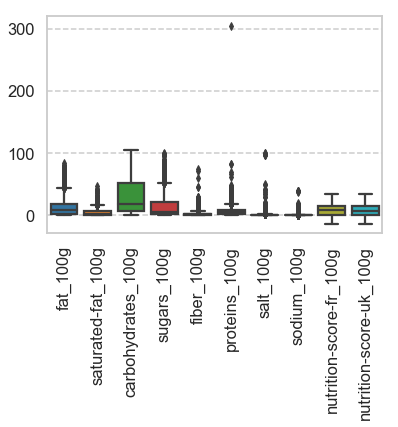

In [144]:
import seaborn as sns
#sns.set_style("white)
sns.set_style("whitegrid", {
    "ytick.major.size": 0.1,
    "ytick.minor.size": 0.05,
    'grid.linestyle': '--'
 })
plot=sns.boxplot(data=data6)
plt.setp(plot.get_xticklabels(), rotation=90)
sns.set_style("dark")


In [151]:
# As part of data cleaning both "nutrition_grade_fr" and 
#"nutrition-score-uk_100g" will be removed as they are another form of identifing the quality 
#of a food item
data7 = data6.drop(columns=["nutrition_grade_fr","nutrition-score-uk_100g"])
data7
#The outcomeis 7633 rows × 10 columns

,countries_tags,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
code,,,,,,,,,,
0000001938067,en:canada,10.70,2.00,38.70,24.700,2.000,3.33,0.647000,0.255000,9.0
0000007020254,en:france,0.00,0.00,14.20,13.600,0.000,0.00,0.061600,0.024200,18.0
0000008237798,en:canada,6.79,2.86,7.86,0.714,0.357,5.36,0.499000,0.196000,2.0
0000027533024,en:united-kingdom,7.00,3.60,54.20,44.000,4.700,3.90,0.200000,0.078740,10.0
0000027533048,en:united-kingdom,7.00,3.60,54.20,44.000,4.700,3.90,0.199898,0.078700,10.0
000030,en:france,19.00,2.50,56.00,28.000,1.800,5.80,0.650000,0.255906,13.0
000031,en:france,15.00,2.00,60.00,34.000,1.500,4.90,0.600000,0.236220,12.0
000050,en:france,23.00,10.00,51.00,39.000,1.700,8.00,0.550000,0.216535,22.0
000051,en:france,24.00,10.00,50.00,37.000,2.500,8.10,0.780000,0.307087,22.0


In [122]:
#To start understanding the dataset and the impact of one feature on another one, I used linear regression to 
#predict the I tired to used linear regression predict the level of fiber in a food item from the amount of 
#protien as shown below:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt


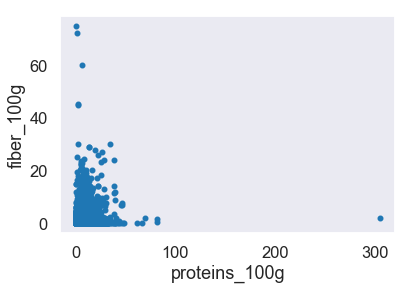

In [145]:
dataR = data7[["proteins_100g", "fiber_100g"]]
dataR.plot(kind = 'scatter', x ="proteins_100g", y= "fiber_100g" )
plt.show()

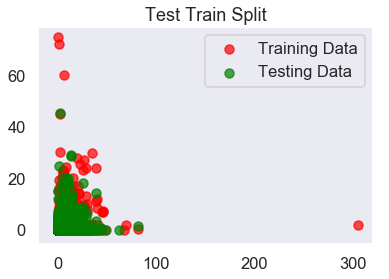

In [146]:
x_train, x_test, y_train, y_test = train_test_split(dataR["proteins_100g"],dataR["fiber_100g"])
plt.scatter(x_train, y_train, label = "Training Data", color = 'r', alpha=0.7)
plt.scatter(x_test, y_test,label = "Testing Data", color = 'g', alpha =0.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [147]:
LR = LinearRegression()
LR.fit(x_train.values.reshape(-1,1), y_train.values)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

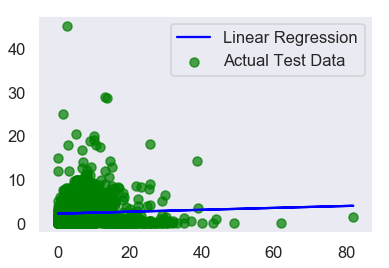

In [148]:
prediction = LR.predict(x_test.values.reshape(-1,1))
plt.plot(x_test, prediction, label = 'Linear Regression', color = 'b')
plt.scatter(x_test,y_test, label = 'Actual Test Data', color ='g', alpha =.7 )
plt.legend()
plt.show()

In [ ]:
# The model is in blue against the actual data in green.  

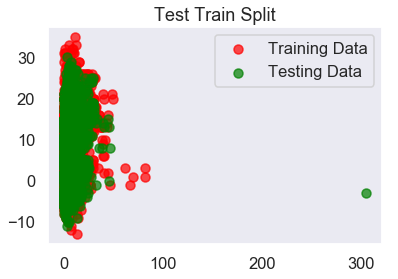

In [149]:
dataR2 = data7[["proteins_100g", "nutrition-score-fr_100g"]]
x_train, x_test, y_train, y_test = train_test_split(dataR2["proteins_100g"],dataR2["nutrition-score-fr_100g"])
plt.scatter(x_train, y_train, label = "Training Data", color = 'r', alpha=0.7)
plt.scatter(x_test, y_test,label = "Testing Data", color = 'g', alpha =0.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

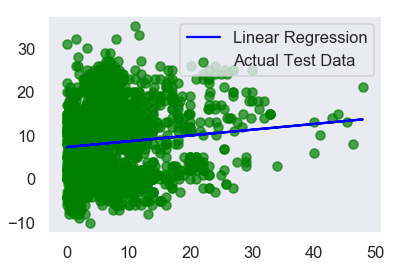

In [136]:
LR2 = LinearRegression()
LR2.fit(x_train.values.reshape(-1,1), y_train.values)
prediction2 = LR2.predict(x_test.values.reshape(-1,1))
plt.plot(x_test, prediction2, label = 'Linear Regression', color = 'b')
plt.scatter(x_test,y_test, label = 'Actual Test Data', color ='g', alpha =.7 )
plt.legend()
plt.show()


In [150]:
LR2.predict(np.array([[50]]))[0]

13.956424201522227

In [ ]:
# The model is in blue against the actual data in green.  
#Next I'll explore the possiblity of using the "countries_tag" along with other features to 
#predict"nutrition-score-fr_100g".
#Firt, for the coutnries_tag colunm, I'll convert it to multi-lable-encoding 

In [180]:
from sklearn.preprocessing import MultiLabelBinarizer
countries_b = data7[["countries_tags"]]
#countries_bin.nunique().sum()
print(type(countries_bin))
countries_bin = countries_b.values.tolist()
print(type(countries_bin))
one_hot = MultiLabelBinarizer()
for i in range(len(countries_bin)):
    countries_bin[i] = str(countries_bin[i]).replace(',' , "','")
    #print(countries_bin[i])
#countries_bin = countries_b.values.tolist()    


<class 'list'>
<class 'list'>
['en:canada']
['en:france']
['en:canada']
['en:united-kingdom']
['en:united-kingdom']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france','en:united-kingdom']
['en:france']
['en:france','en:united-kingdom']
['en:france','en:united-kingdom']
['en:france','en:united-kingdom']
['en:belgium','en:france','en:netherlands','en:united-kingdom']
['en:belgium','en:france','en:netherlands','en:united-kingdom']
['en:france','en:united-kingdom']
['en:france']
['en:france']
['en:france']
['en:france']
['en:united-kingdom']
['en:france','en:united-kingdom']
['en:france','en:united-kingdom']
['en:united-kingdom']
['en:france','en:united-kingdom']
['en:united-states']
['en:france','en:united-kingdom']
['en:united-states']
['en:united-states']
['en:belgium','en:france','en:netherlands','en:united-kingdom']
['en:france']
['en:france','en:united-kingdom']
['en:france','en:united-kingdom']
['en:united-kingdom']
['en:united-kingdom']
['en:united-k

['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:belgium','en:france','en:poland','en:portugal']
['en:fran

['en:france','en:spain']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:fran

['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:france']
['en:portugal']
['en:france']
['en:france']
['en:portugal']
['en:denmark']
['en:france']
['en:hungary']
['en:poland','en:united-kingdom']
['en:france']
['en:france']
['en:serbia']
['en:serbia']
['en:united-kingdom']
['en:hungary']
['en:romania']
['en:france','en:romania']
['en:spain']
['en:spain']
['en:spain']
['en:spain']
['en:serbia']
['en:serbia']
['en:serbia']
['en:belgium','en:france']
['en:serbia']
['en:hungary']
['en:france','en:germany']
['en:hungary']
['en:hungary']
['en:hungary']
['en:serbia']
['en:south-africa']
['en:united-kingdom']
['en:france']
['en:france']
['en:south-africa']
['en:republic-of-the-congo','en:senegal']
['en:france']
['en:france']
['en:france']
['en:france']
['en:mexico']
['en:austria']
['en:tunisia']
['en:france']
['en:france']
['en:mexico']
['en:france']
['en:france','en:spain']
['en:united-states']
['en:united-states']
['en:france']
['en:france']
['en:france']
['en:austr

In [182]:
print(type(countries_bin))

<class 'list'>


In [188]:
count_b = one_hot.fit_transform(countries_bin)

count_b_classes =one_hot.classes_

print(count_b)
count_b.shape
print(count_b_classes)
count_b.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['en:albania,en:italy'
 'en:algeria,en:belgium,en:france,en:germany,en:guadeloupe,en:italy,en:lebanon,en:luxembourg,en:martinique,en:morocco,en:netherlands,en:portugal,en:reunion,en:senegal,en:spain,en:switzerland,en:united-kingdom'
 'en:andorra,en:spain' 'en:argentina' 'en:australia'
 'en:australia,en:belgium,en:france,en:switzerland'
 'en:australia,en:indonesia,en:united-states'
 'en:australia,en:new-zealand' 'en:australia,en:united-states'
 'en:austria' 'en:austria,en:czech-republic,en:france,en:germany'
 'en:austria,en:france,en:germany,en:italy,en:switzerland' 'en:belgium'
 'en:belgium,en:canada,en:denmark,en:france,en:germany,en:morocco,en:spain,en:switzerland'
 'en:belgium,en:chile,en:france'
 'en:belgium,en:denmark,en:finland,en:france,en:italy,en:morocco,en:spain,en:sweden,en:switzerland'
 'en:belgium,en:france' 'en:belgium,en:france,en:germany'
 'en:belgium,

(7633, 156)

In [ ]:
df = pd.DataFrame(countries_bin)